In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia euclideana
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 0 1 1 0 1]
[[1.16666667 1.46666667]
 [7.33333333 9.        ]]


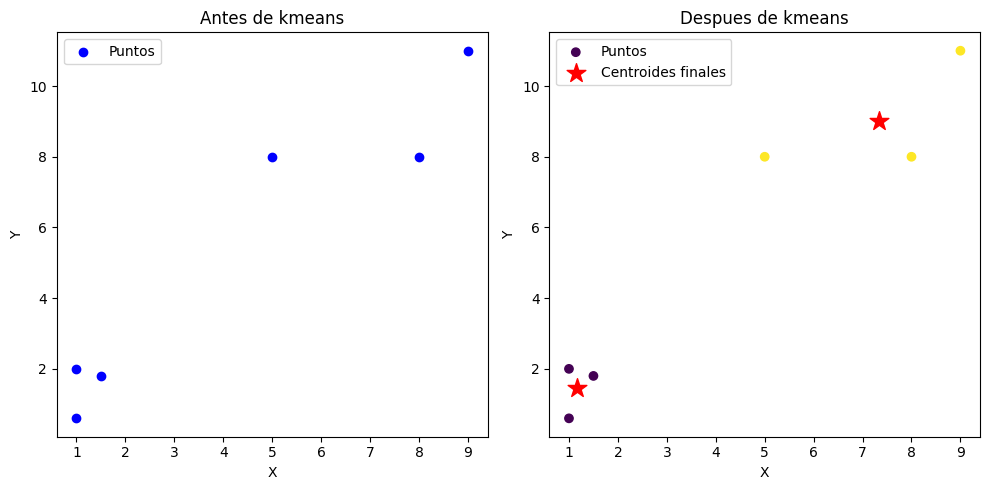

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de Manhattan
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

[1 1 0 1 1 0]
[[7.    9.5  ]
 [2.875 3.1  ]]


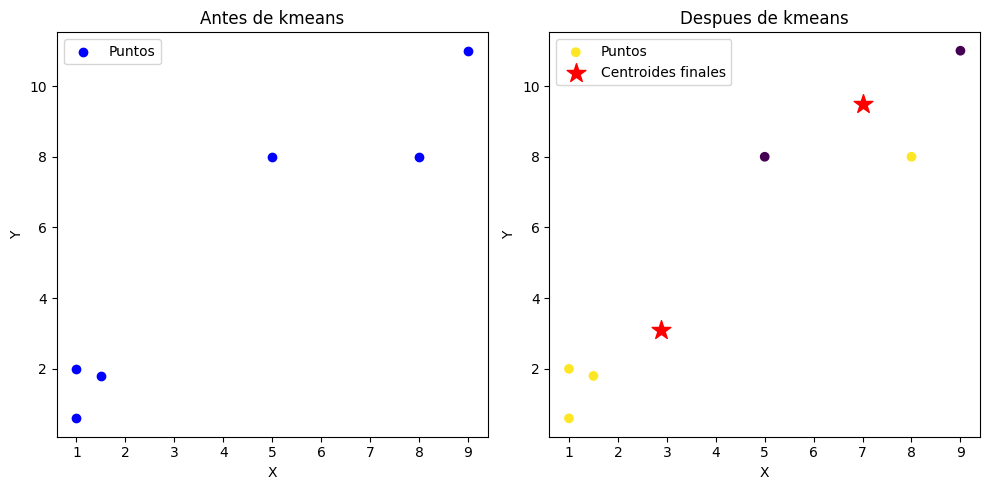

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

In [ ]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = np.array([[1, 2, 0], [1.5, 1.8, 6], [-1, 5, 8], [3.2, 8, 8], [3, 1, 0.6], [-8, 9, 11]])
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 2 2 2 1 0]
[[-8.          9.         11.        ]
 [ 2.          1.5         0.3       ]
 [ 1.23333333  4.93333333  7.33333333]]


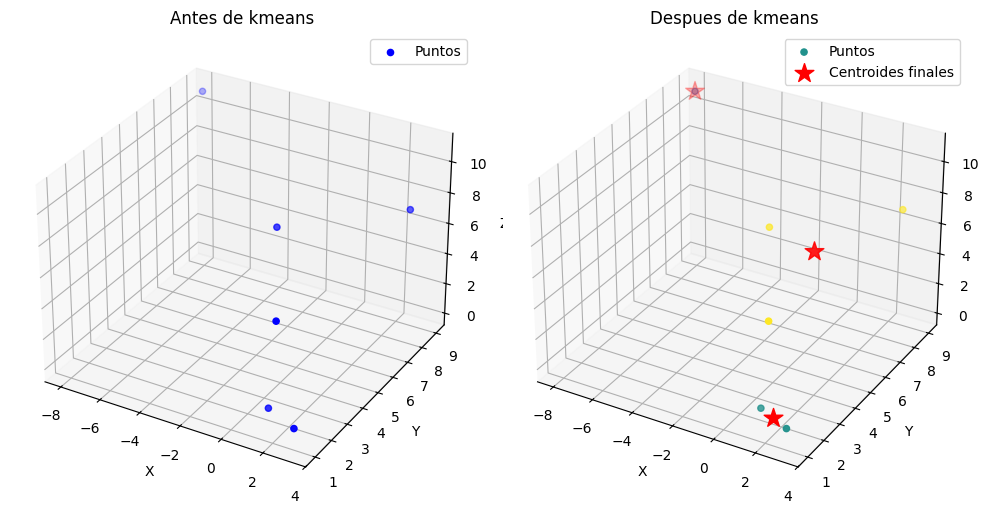

In [ ]:
dibujar3D(points, kmeans.centroids, labels)

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

In [ ]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 1 2 1 1 1 1 1 1 2 2 2 1 0 0 1 1 1 0 0 2 1 1 1 2 2 1 0 2 2 2 1 0 0 1 1 1
 1 1 1 2 0 0 1 1 1 2 0 1 1 1 1 1 1 2 1 2 2 1 0 2 2 1 1 1 1 0 0 0 1 1 2 2 0
 1 1 2 0 1 1 2 1 1 1 2 2 0 1 1 1 2 0 1 2 1 2 0 0 1 0 1 1 1 1 0 1 1 0 1 1 2
 0 1 0 1 1 1 1 1 0 2 1 0 1 0 1 2 1 2 0 1 1 2 1 1 0 0 1 1 1 0 2 2 1 1 0 0 1
 0 0 2 0 2 2 1 0 1 0 1 2 1 1 2 1 1 1 0 2 1 0 1 0 1 0 2 1 2 2 1 1 0 0 0 1 1
 1 2 1 1 0 0 1 0 1 0 1 1 2 1 0 0 2 1 1 2 2 1 2 1 2 2 1 2 1 1 2 1 1 2 0 1 1
 2 1 2 1 2 1 1 1 2 1 1 1 1 0 1 0 1 1 2 0 2 1 1 1 1 1 1 0 2 1 0 2 1 1 2 1 2
 1 0 1 1 2 0 0 1 2 2 1 1 1 2 1 0 1 2 0 0 1 1 0 0 2 0 1 0 1 2 2 0 2 2 0 1 1
 0 1 2 0 1 1 1 1 0 1 2 1 0 2 2 0 2 2 1 1 0 2 1 1 2 1 2 0 0 2 1 1 0 1 0 0 2
 1 2 0 2 2 1 2 2 1 2 1 1 1 2 2 0 1 1 0 2 1 1 0 0 2 0 1 1 0 2 1 0 1 1 0 0 2
 0 1 1 1 1 1 0 1 1 0 0 2 1 1 1 1 1 2 2 1 2 0 1 1 1 1 2 2 1 0 0 0 1 2 2 0 1
 0 2 0 1 1 2 1 1 1 2 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 2 2 1 1 0 0 1 0 1 1 0 0
 2 0 1 1 2 2 2 1 1 1 2 0 0 0 1 0 1 1 2 1 1 1 0 1 1 1 1 1 1 1 2 1 0 2 2 0 2
 2 1 1 1 2 0 0 1 1 1 0 1 

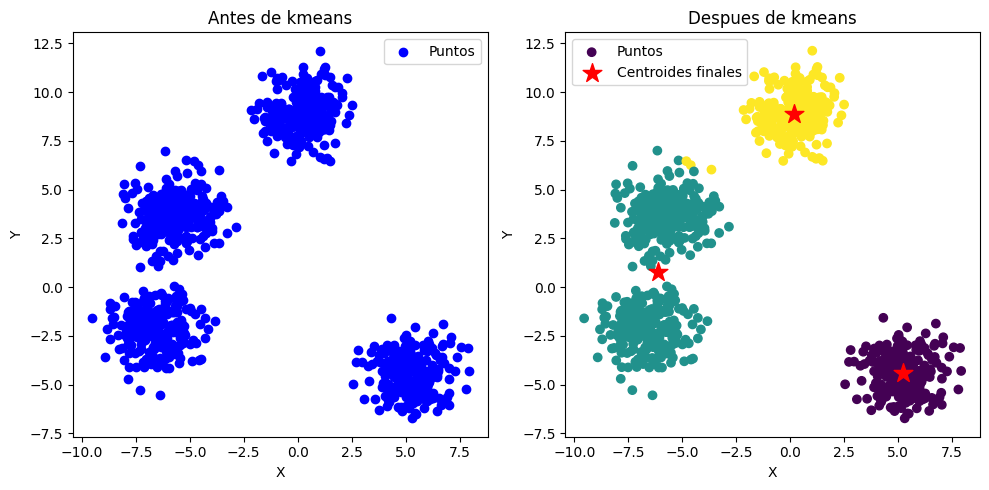

In [ ]:

dibujar2D(points, kmeans.centroids, labels)

# Grupo 4

Santiago Orozco Carmona

Dayanna Montes Gómez

Robert López Oviedo

# Experimento 1

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

[1 0 2 0 0 0 0 0 0 2 2 2 0 1 1 0 0 0 1 1 2 0 0 0 2 2 0 1 2 2 2 0 1 1 0 0 0
 0 0 0 2 1 1 0 0 0 2 1 0 0 0 0 0 0 2 0 2 2 0 1 2 2 0 0 0 0 1 1 1 0 0 2 2 1
 0 0 2 1 0 0 2 0 0 0 2 2 1 0 0 0 2 1 0 2 0 2 1 1 0 1 0 0 0 0 1 0 0 1 0 0 2
 1 0 1 0 0 0 0 0 1 2 0 1 0 1 0 2 0 2 1 0 0 2 0 0 1 1 0 0 0 1 2 2 0 0 1 1 0
 1 1 2 1 2 2 0 1 0 1 0 2 0 0 2 0 0 0 1 2 0 1 0 1 0 1 2 0 2 2 0 0 1 1 1 0 0
 0 2 0 0 1 1 0 1 0 1 0 0 2 0 1 1 2 0 0 2 2 0 2 0 2 2 0 2 0 0 2 0 0 2 1 0 0
 2 0 2 0 2 0 0 0 2 0 0 0 0 1 0 1 0 0 2 1 2 0 0 0 0 0 0 1 2 0 1 2 0 0 2 0 2
 0 1 0 0 2 1 1 0 2 2 0 0 0 2 0 1 0 2 1 1 0 0 1 1 2 1 0 1 0 2 2 1 2 2 1 0 0
 1 0 2 1 0 0 0 0 1 0 2 0 1 2 2 1 2 2 0 0 1 2 0 0 2 0 2 1 1 2 0 0 1 0 1 1 2
 0 2 1 2 2 0 2 2 0 2 0 0 0 2 2 1 0 0 1 2 0 0 1 1 2 1 0 0 1 2 0 1 0 0 1 1 2
 1 0 0 0 0 0 1 0 0 1 1 2 0 0 0 0 0 2 2 0 2 1 0 0 0 0 2 2 0 1 1 1 0 2 2 1 0
 1 2 1 0 0 2 0 0 0 2 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 2 2 0 0 1 1 0 1 0 0 1 1
 2 1 0 0 2 2 2 0 0 0 2 1 1 1 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 1 2 2 1 2
 2 0 2 0 2 1 1 0 0 0 1 0 

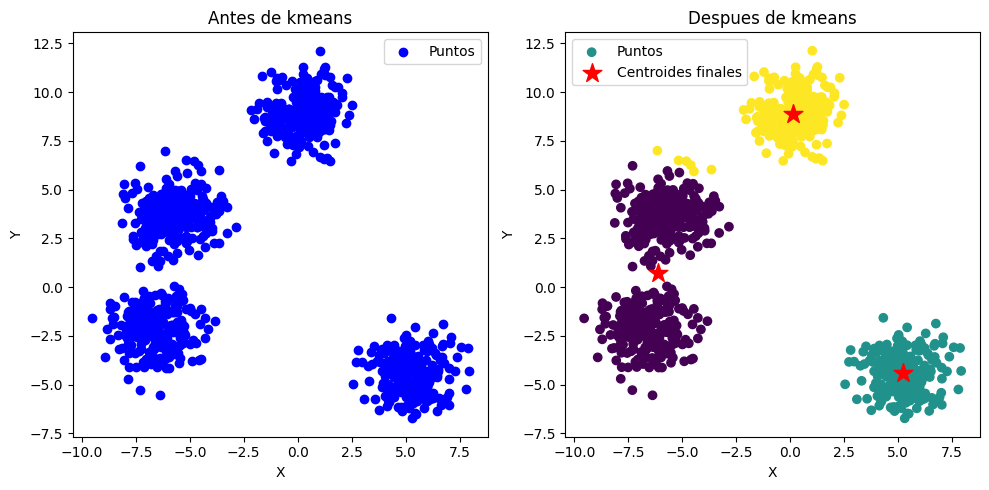

[2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0
 0 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 2 0 2 0 0 0 0 2 0 0 2 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 1 0 0 0 0 2 1 0
 2 1 0 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 2 0 0 0 0 0 0 2 1 2 0 0
 0 0 0 0 2 2 0 2 0 1 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0
 0 1 0 0 0 2 1 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 2 0 0 0 0 2 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 1 0 1 1 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 2 1 0 1 0 0 2 0 0 2 0 0 1 2 0
 2 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 2 1 0 0 0 2 0
 2 0 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 2 2 0 1 0 0 1 2
 0 2 0 0 0 0 0 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0
 0 0 0 0 0 1 2 0 0 0 1 0 

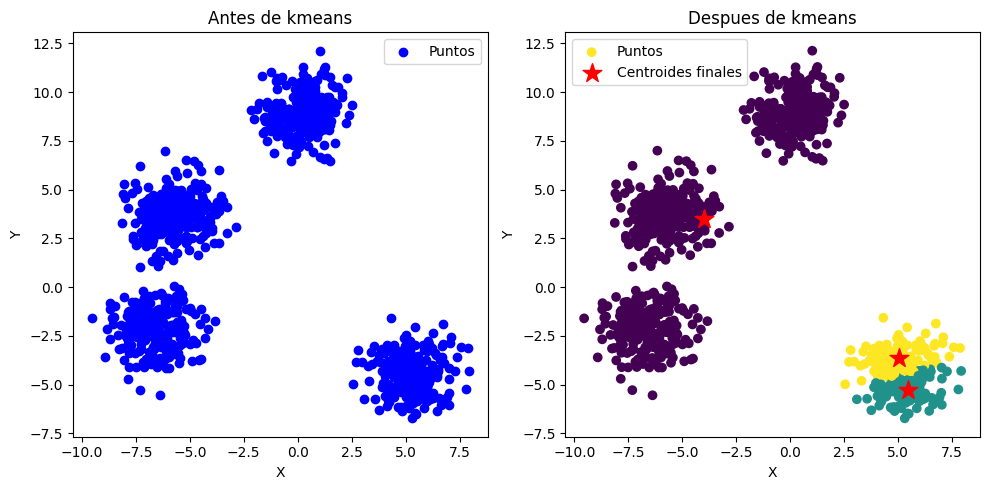

[2 1 0 1 1 1 1 1 1 0 0 0 1 2 2 1 1 1 2 2 0 1 1 1 0 0 1 2 0 0 0 1 2 2 1 1 1
 1 1 1 0 2 2 1 1 1 0 2 1 1 1 1 1 1 0 1 0 0 1 2 0 0 1 1 1 1 2 2 2 1 1 0 0 2
 1 1 0 2 1 1 0 1 1 1 0 0 2 1 1 1 0 2 1 0 1 0 2 2 1 2 1 1 1 1 2 1 1 2 1 1 0
 2 1 2 1 1 1 1 1 2 0 1 2 1 2 1 0 1 0 2 1 1 0 1 1 2 2 1 1 1 2 0 0 1 1 2 2 1
 2 2 0 2 0 0 1 2 1 2 1 0 1 1 0 1 1 1 2 0 1 2 1 2 1 2 0 1 0 0 1 1 2 2 2 1 1
 1 0 1 1 2 2 1 2 1 2 1 1 0 1 2 2 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 2 1 1
 0 1 0 1 0 1 1 1 0 1 1 1 1 2 1 2 1 1 0 2 0 1 1 1 1 1 1 2 0 1 2 0 1 1 0 1 0
 1 2 1 1 0 2 2 1 0 0 1 1 1 0 1 2 1 0 2 2 1 1 2 2 0 2 1 2 1 0 0 2 0 0 2 1 1
 2 1 0 2 1 1 1 1 2 1 0 1 2 0 0 2 0 0 1 1 2 0 1 1 0 1 0 2 2 0 1 1 2 1 2 2 0
 1 0 2 0 0 1 0 0 1 0 1 1 1 0 0 2 1 1 2 0 1 1 2 2 0 2 1 1 2 0 1 2 1 1 2 2 0
 2 1 1 1 1 1 2 1 1 2 2 0 1 1 1 1 1 0 0 1 0 2 1 1 1 1 0 0 1 2 2 2 1 0 0 2 1
 2 0 2 1 1 0 1 1 1 0 2 1 1 1 1 2 1 1 2 1 2 1 1 1 1 0 0 1 1 2 2 1 2 1 1 2 2
 0 2 1 1 0 0 0 1 1 1 0 2 2 2 1 2 1 1 0 1 1 1 2 1 1 1 1 1 1 1 0 1 2 0 0 2 0
 0 1 0 1 0 2 2 1 1 1 2 1 

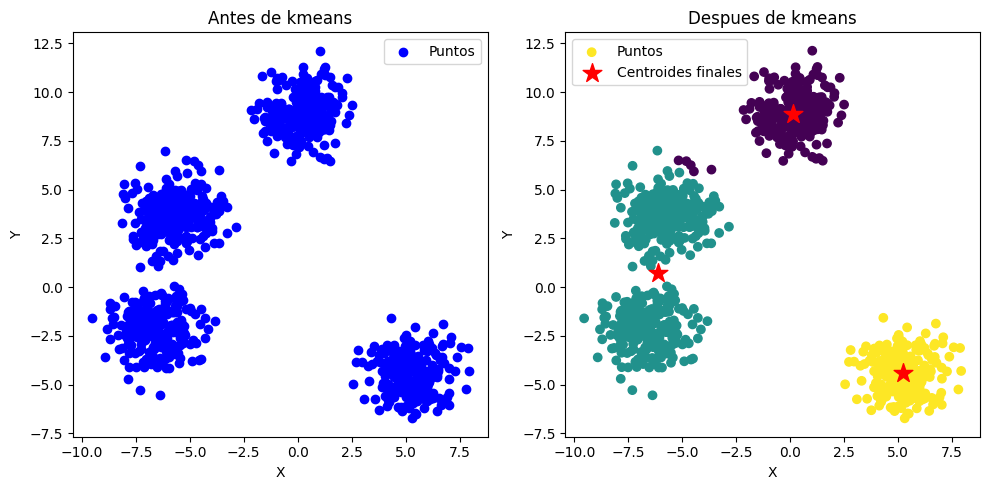

[1 0 2 0 0 0 0 0 0 2 2 2 0 1 1 0 0 0 1 1 2 0 0 0 2 2 0 1 2 2 2 0 1 1 0 0 0
 0 0 0 2 1 1 0 0 0 2 1 0 0 0 0 0 0 2 0 2 2 0 1 2 2 0 0 0 0 1 1 1 0 0 2 2 1
 0 0 2 1 0 0 2 0 0 0 2 2 1 0 0 0 2 1 0 2 0 2 1 1 0 1 0 0 0 0 1 0 0 1 0 0 2
 1 0 1 0 0 0 0 0 1 2 0 1 0 1 0 2 0 2 1 0 0 2 0 0 1 1 0 0 0 1 2 2 0 0 1 1 0
 1 1 2 1 2 2 0 1 0 1 0 2 0 0 2 0 0 0 1 2 0 1 0 1 0 1 2 0 2 2 0 0 1 1 1 0 0
 0 2 0 0 1 1 0 1 0 1 0 0 2 0 1 1 2 0 0 2 2 0 2 0 2 2 0 2 0 0 2 0 0 2 1 0 0
 2 0 2 0 2 0 0 0 2 0 0 0 0 1 0 1 0 0 2 1 2 0 0 0 0 0 0 1 2 0 1 2 0 0 2 0 2
 0 1 0 0 2 1 1 0 2 2 0 0 0 2 0 1 0 2 1 1 0 0 1 1 2 1 0 1 0 2 2 1 2 2 1 0 0
 1 0 2 1 0 0 0 0 1 0 2 0 1 2 2 1 2 2 0 0 1 2 0 0 2 0 2 1 1 2 0 0 1 0 1 1 2
 0 2 1 2 2 0 2 2 0 2 0 0 0 2 2 1 0 0 1 2 0 0 1 1 2 1 0 0 1 2 0 1 0 0 1 1 2
 1 0 0 0 0 0 1 0 0 1 1 2 0 0 0 0 0 2 2 0 2 1 0 0 0 0 2 2 0 1 1 1 0 2 2 1 0
 1 2 1 0 0 2 0 0 0 2 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 2 2 0 0 1 1 0 1 0 0 1 1
 2 1 0 0 2 2 2 0 0 0 2 1 1 1 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 1 2 2 1 2
 2 0 2 0 2 1 1 0 0 0 1 0 

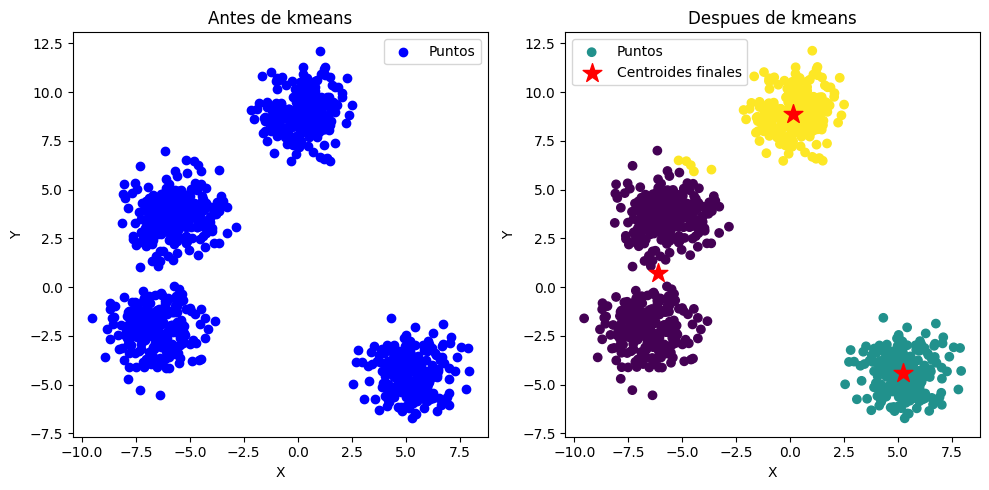

In [ ]:
numeros = [10,100,1000,10000]

for num in numeros:
    kmeans = KMeans(k=3, max_iter=num)
    labels = kmeans.run(points)
    print(labels)
    print(kmeans.centroids)

    dibujar2D(points, kmeans.centroids, labels)

# Análisis Experimento 1
En el siguiente  análisis veremos el funcionamiento del algoritmo k means; pero antes debemos decir que este algoritmo es un método de agrupamiento no supervisado que busca particional cierto número de observaciones en k grupos en los que cada observación pertenece al grupo con la media más cercana (el centroide o centro del clúster). Con esta idea partimos a experimentar los diferentes resultados arrojados con cada ejecución.
Tenemos 4 imágenes, cada una de estas tienen un antes y un después; en la primera parte tenemos varios conjuntos de datos. Los cuales no tienen orden, valores y tampoco representan ningún tipo de información, solo son datos dispersos de manera simple dispuestos en 2 ejes.
En la segunda parte, aplicaremos el algoritmo kmeans para dar sentido a los conjuntos de datos en cada imagen, en la segunda gráfica; vemos que el algoritmo tiene la capacidad de agrupar y clasificar por colores a cada clúster y aplicar una distancia media entre ellos, con cada ejecución vemos que el algoritmo es capaz de variar los diseños de las graficas pero, observamos que es muy propenso a mantener el mismo patrón en lo referente a la reagrupación ¿pero por qué sucede este caso? Resulta que con cada nueva Actualización; Se recalculan las posiciones de los centroides. Cada nuevo centroide es el promedio de todos los puntos de datos asignados a ese clúster. Por tal razón, vemos que hay agrupaciones que contiene unos cuantos puntos de otro grupo aunque esté un poco lejos.
Con este primer experimento vemos la capacidad del algoritmo en dimensiones en 2D y como organiza y clasifica los clusters por color.

# Experimento 2

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)

[0 2 2 2 2 2 2 1 1 0 1 0 0 2 2 1 2 0 2 1 2 0 2 2 0 2 0 1 2 1 2 2 1 2 1 2 2
 1 2 0 2 2 2 2 2 1 0 1 2 1 2 2 1 2 2 1 2 0 1 2 1 1 2 2 0 2 2 1 2 2 1 2 1 2
 2 2 0 2 2 1 0 0 0 2 2 0 0 1 1 2 2 1 2 2 1 2 0 1 0 1 2 2 1 0 2 2 0 0 2 1 1
 0 2 0 1 0 2 1 0 2 0 2 2 0 1 0 2 1 2 2 2 1 2 2 2 2 1 2 1 2 0 1 1 0 1 1 0 0
 2 0 0 2 2 2 0 0 1 0 2 2 1 0 1 2 2 2 0 2 0 2 2 2 2 2 0 2 2 1 2 0 1 1 0 0 2
 2 1 2 2 2 0 1 0 0 2 0 1 0 2 2 2 1 0 0 1 2 2 1 1 1 2 2 2 0 2 0 0 1 0 2 2 1
 2 0 0 0 2 0 2 1 1 2 2 0 1 0 2 1 1 2 2 2 2 1 2 2 0 2 0 2 2 1 0 0 1 0 2 1 1
 2 0 0 1 1 1 2 0 2 0 0 2 0 0 0 1 2 2 0 0 2 2 2 1 1 0 0 1 2 1 1 2 2 1 1 1 0
 0 2 2 0 1 2 2 0 0 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 2 2 1 2 0 0 1 0 0 1
 2 2 2 2 1 0 0 2 2 0 2 1 2 1 2 2 0 1 0 0 0 0 2 0 2 2 0 2 0 2 0 2 0 0 0 0 2
 2 2 2 2 1 2 2 2 1 0 2 2 0 2 2 1 1 0 2 1 1 2 1 2 0 0 1 2 2 2 2 1 2 2 2 0 2
 1 2 1 2 2 2 0 2 2 2 2 1 0 1 1 0 2 1 2 2 0 2 1 2 0 2 0 2 0 2 2 1 2 2 2 2 1
 2 0 0 1 0 1 0 1 2 1 2 2 1 0 0 2 1 0 0 2 0 2 2 0 2 2 1 1 2 0 2 1 2 2 2 2 2
 0 0 1 0 0 2 0 0 0 0 1 2 

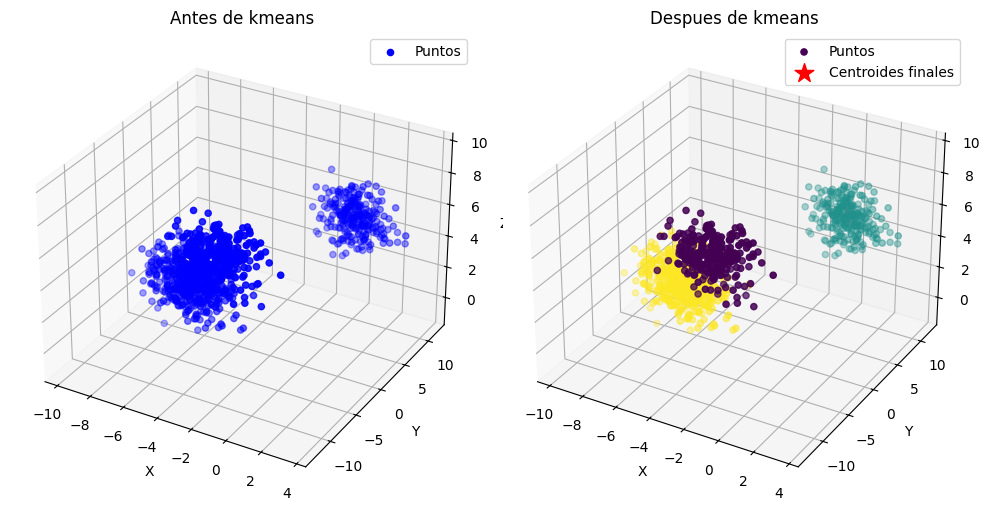

[2 2 2 2 2 2 2 1 1 2 0 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 0 2 0 2 2 1 2 0 2 2
 0 2 2 2 2 2 2 2 1 2 0 2 0 2 2 1 2 2 0 2 2 0 2 1 1 2 2 2 2 2 1 2 2 1 2 1 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 0 1 2 2 0 2 2 0 2 2 0 2 1 2 2 0 2 2 2 2 2 2 0 1
 2 2 2 0 2 2 1 2 2 2 2 2 2 1 2 2 1 2 2 2 0 2 2 2 2 1 2 0 2 2 0 1 2 0 0 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 0 2 2 2
 2 1 2 2 2 2 1 2 2 2 2 0 2 2 2 2 0 2 2 1 2 2 0 1 0 2 2 2 2 2 2 2 0 2 2 2 0
 2 2 2 2 2 2 2 0 1 2 2 2 1 2 2 0 1 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 1 2 2 1 1
 2 2 2 1 1 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 0 1 2 2 0 1 0 2
 2 2 2 2 1 2 2 2 2 2 2 2 0 0 0 0 1 2 2 1 1 0 1 2 2 2 2 2 2 1 2 2 2 0 2 2 0
 2 2 2 2 0 2 2 2 2 2 2 0 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2
 0 2 1 2 2 2 2 2 2 2 2 1 2 1 0 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 1
 2 2 2 1 2 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 0 2 

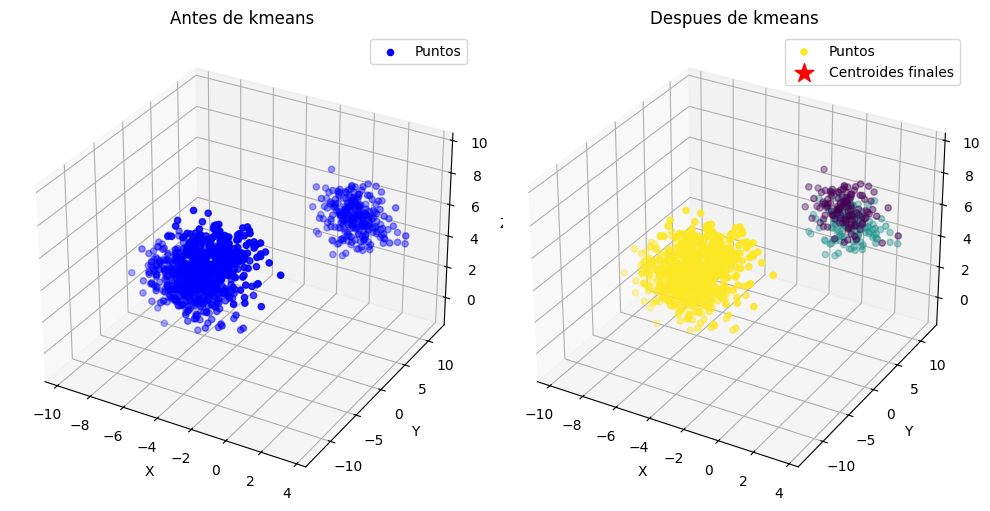

[1 2 2 2 2 2 2 0 0 1 0 1 1 2 2 0 2 1 2 0 2 1 2 2 1 2 1 0 2 0 2 2 0 2 0 2 2
 0 2 1 2 2 2 2 2 0 1 0 2 0 2 2 0 2 2 0 2 1 0 2 0 0 2 2 1 2 2 0 2 2 0 2 0 2
 2 2 1 2 2 0 1 1 1 2 2 1 1 0 0 2 2 0 2 2 0 2 1 0 1 0 2 2 0 1 2 2 1 1 2 0 0
 1 2 1 0 1 2 0 1 2 1 2 2 1 0 1 2 0 2 2 2 0 2 2 2 2 0 2 0 2 1 0 0 1 0 0 1 1
 2 1 1 2 2 2 1 1 0 1 2 2 0 1 0 2 2 2 1 2 1 2 2 2 2 2 1 2 2 0 2 1 0 0 1 1 2
 2 0 2 2 2 1 0 1 1 2 1 0 1 2 2 2 0 1 1 0 2 2 0 0 0 2 2 2 1 2 1 1 0 1 2 2 0
 2 1 1 1 2 1 2 0 0 2 2 1 0 1 2 0 0 2 2 2 2 0 2 2 1 2 1 2 2 0 1 1 0 1 2 0 0
 2 1 1 0 0 0 2 1 2 1 1 2 1 1 1 0 2 2 1 1 2 2 2 0 0 1 1 0 2 0 0 2 2 0 0 0 1
 1 2 2 1 0 2 2 1 1 2 2 2 0 0 0 0 0 2 2 0 0 0 0 2 2 2 2 2 2 0 2 1 1 0 1 1 0
 2 2 2 2 0 1 1 2 2 1 2 0 2 0 2 2 1 0 1 1 1 1 2 1 2 2 1 2 1 2 1 2 1 1 1 1 2
 2 2 2 2 0 2 2 2 0 1 2 2 1 2 2 0 0 1 2 0 0 2 0 2 1 1 0 2 2 2 2 0 2 2 2 1 2
 0 2 0 2 2 2 1 2 2 2 2 0 1 0 0 1 2 0 2 2 1 2 0 2 1 2 1 2 1 2 2 0 2 2 2 2 0
 2 1 1 0 1 0 1 0 2 0 2 2 0 1 1 2 0 1 1 2 1 2 2 1 2 2 0 0 2 1 2 0 2 2 2 2 2
 1 1 0 1 1 2 1 1 1 1 0 2 

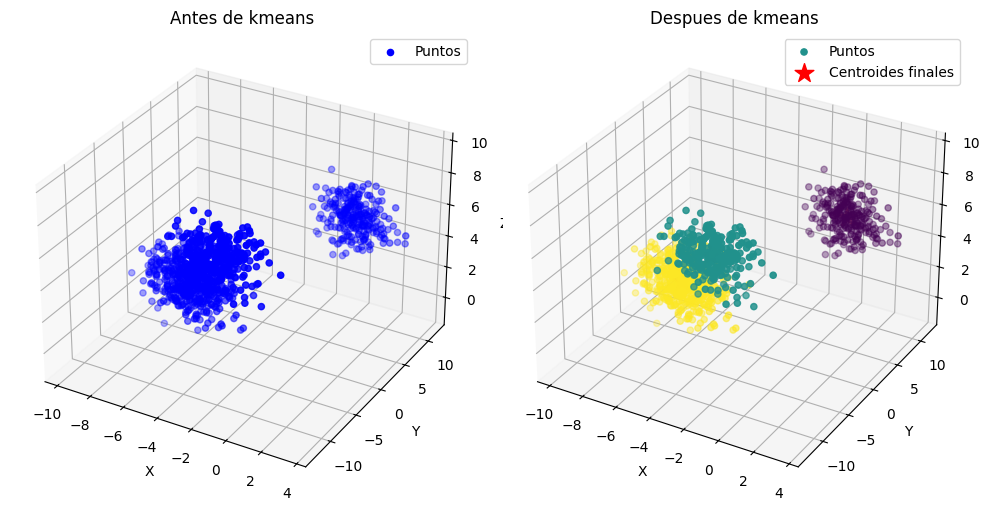

[2 1 1 1 1 1 1 0 0 2 0 2 2 1 1 0 1 2 1 0 1 2 1 1 2 1 2 0 1 0 1 1 0 1 0 1 1
 0 1 2 1 1 1 1 1 0 2 0 1 0 1 1 0 1 1 0 1 2 0 1 0 0 1 1 2 1 1 0 1 1 0 1 0 1
 1 1 2 1 1 0 2 2 2 1 1 2 2 0 0 1 1 0 1 1 0 1 2 0 2 0 1 1 0 2 1 1 2 2 1 0 0
 2 1 2 0 2 1 0 2 1 2 1 1 2 0 2 1 0 1 1 1 0 1 1 1 1 0 1 0 1 2 0 0 2 0 0 2 2
 1 2 2 1 1 1 2 2 0 2 1 1 0 2 0 1 1 1 2 1 2 1 1 1 1 1 2 1 1 0 1 2 0 0 2 2 1
 1 0 1 1 1 2 0 2 2 1 2 0 2 1 1 1 0 2 2 0 1 1 0 0 0 1 1 1 2 1 2 2 0 2 1 1 0
 1 2 2 2 1 2 1 0 0 1 1 2 0 2 1 0 0 1 1 1 1 0 1 1 2 1 2 1 1 0 2 2 0 2 1 0 0
 1 2 2 0 0 0 1 2 1 2 2 1 2 2 2 0 1 1 2 2 1 1 1 0 0 2 2 0 1 0 0 1 1 0 0 0 2
 2 1 1 2 0 1 1 2 2 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 2 2 0 2 2 0
 1 1 1 1 0 2 2 1 1 2 1 0 1 0 1 1 2 0 2 2 2 2 1 2 1 1 2 1 2 1 2 1 2 2 2 2 1
 1 1 1 1 0 1 1 1 0 2 1 1 2 1 1 0 0 2 1 0 0 1 0 1 2 2 0 1 1 1 1 0 1 1 1 2 1
 0 1 0 1 1 1 2 1 1 1 1 0 2 0 0 2 1 0 1 1 2 1 0 1 2 1 2 1 2 1 1 0 1 1 1 1 0
 1 2 2 0 2 0 2 0 1 0 1 1 0 2 2 1 0 2 2 1 2 1 1 2 1 1 0 0 1 2 1 0 1 1 1 1 1
 2 2 0 2 2 1 2 2 2 2 0 1 

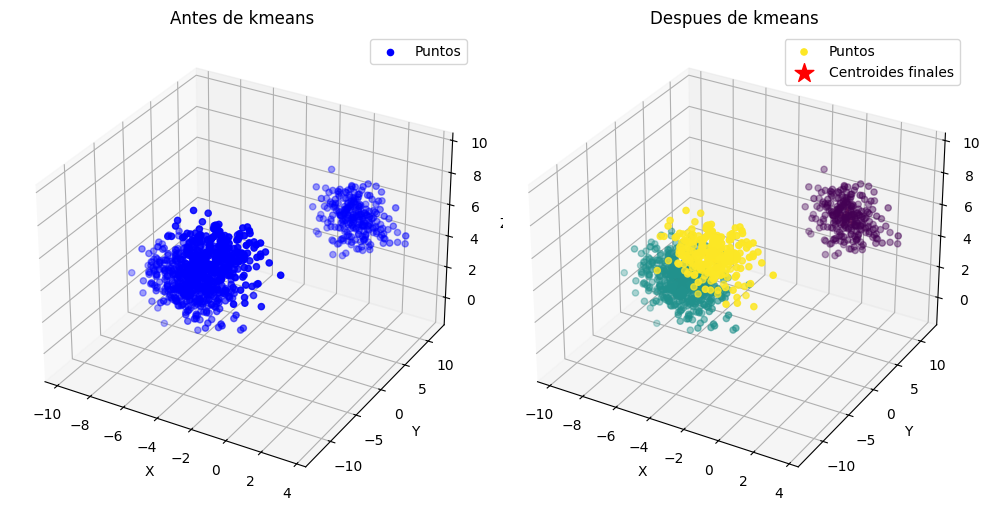

In [ ]:
numeros = [10,100,1000,10000]

for num in numeros:
    kmeans = KMeans(k=3)
    labels = kmeans.run(points)
    print(labels)
    print(kmeans.centroids)

    dibujar3D(points, kmeans.centroids, labels)

# Análisis Experimento 2
Para el siguiente experimento haremos la aplicación del algoritmo kmeans, pero esta vez entrará en acción en una gráfica en 3D. Observaremos el comportamiento del código en 3 diferentes ejes.
Como en el experimento anterior, aquí tenemos 4 imágenes y en cada una vemos 2 gráficas, una del antes y la otra después de kmeans. Vemos que antes de aplicar el código, tenemos las agrupaciones de conjuntos de datos sin sentido, por lo cual no tenemos información. Pero, ahora vamos a observar a la derecha de la imagen, donde vemos ya el trabajo del algoritmo en 3D, vemos que tomó cada conjunto de datos ya procesado por posición y color, lo que nos permite visualizar el orden de cada conjunto y el centroide por agrupación. O sea que El algoritmo k-means ha reorganizado los datos, asignando cada punto a un clúster específico basado en la distancia a los centroides, lo que permite una
clara separación visual de los grupos.
El proceso del código es el mismo descrito en el experimento anterior, solo que en este caso usamos 3 ejes, “X, Y, Z”. En estas 3 dimensiones se lleva el mismo recalculo por cada nueva ejecución sin hacer ningún cambio en la codificación. Eso sí, por cada nueva interación, nos deja un nuevo gráfico por analizar.

# Experimento 3

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)

In [ ]:
numeros = [10,100,1000,10000]

for num in numeros:
    kmeans = KMeans(k=3)
    labels = kmeans.run(points)
    print(labels)
    print(kmeans.centroids)

[2 0 1 2 0 2 2 2 0 1 2 2 2 0 1 1 0 1 1 1 1 0 1 1 2 2 1 1 2 0 1 1 1 1 1 2 1
 2 2 0 1 0 2 1 2 1 1 1 1 1 1 0 1 1 0 1 1 2 0 1 1 2 1 1 1 1 1 1 0 0 0 1 2 1
 1 0 2 1 1 1 1 1 0 0 1 2 1 0 1 1 1 1 1 1 0 0 2 1 1 0 2 2 1 1 1 1 0 0 2 1 1
 2 1 2 1 1 1 2 0 1 1 2 0 0 2 2 1 1 1 1 0 0 2 1 1 1 1 2 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 2 2 0 1 2 1 2 1 1 2 0 2 2 1 1 0 1 1 0 1 1 1 2 1 2 0 1 1 2 0 1 1
 2 1 0 1 0 1 2 2 0 2 1 1 0 1 2 1 0 1 1 0 2 1 1 1 1 1 1 0 1 1 1 2 1 2 0 1 1
 1 1 2 1 2 1 1 1 1 1 1 0 2 1 0 1 0 1 0 0 2 2 2 1 1 1 2 1 1 0 0 0 1 2 2 1 0
 1 1 2 1 0 1 0 0 0 2 1 2 1 0 1 0 1 1 2 1 0 0 2 2 1 1 1 0 0 1 2 0 1 0 0 1 2
 1 1 1 0 0 0 0 1 0 0 0 1 1 2 1 2 0 0 1 1 2 1 2 2 1 2 0 2 1 1 2 0 2 1 1 0 2
 2 0 1 0 1 1 2 1 1 2 1 2 0 1 2 1 1 1 1 1 1 0 2 2 2 1 0 1 0 0 1 0 1 0 0 1 1
 1 1 2 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 1 0 1 1 1 1 0 0 1 0 2 1 1 1 1 0 1 1
 2 1 2 1 1 0 2 0 1 2 0 0 0 1 0 1 2 1 2 2 1 1 1 1 2 2 0 1 0 0 1 1 2 2 0 2 0
 1 0 2 0 2 0 1 1 2 0 2 1 0 2 2 1 1 0 1 0 1 0 2 1 1 2 1 0 0 1 2 1 1 2 0 0 0
 0 1 0 1 1 2 1 0 1 0 2 1 

# Análisis Experimento 3
En el siguiente experimento se ejecuto el algoritmo de K-Mens cinco veces y me dio los siguientes centroides de promedios.

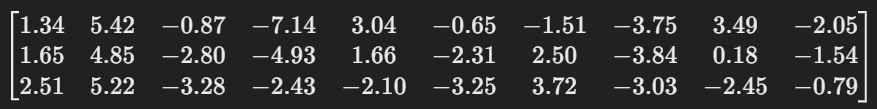


Como conclusión los centroides obtenidos no se vieron variaciones significativas en las cinco ejecuciones. Lo que sugiere que los clusters estan bien definidos y el K-Means coverge de manera consistente. Tambien se observo que cada uno de los 3 clusters encontrados son coordenadas en el espacio de 10 dimensiones.

# Experimento 4

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)

In [ ]:
numeros = [10,100,1000,10000]

for num in numeros:
    kmeans = KMeans(k=3)
    labels = kmeans.run(points)
    print(labels)
    print(kmeans.centroids)

[0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 2 0 2 2 0 2 1 0 0 0 0 2 1 1 0 2 0 1 2 2 2 2
 2 2 0 2 0 2 0 2 1 0 2 0 0 0 0 0 2 2 1 2 2 0 2 0 2 0 1 2 2 1 1 0 0 0 1 1 1
 0 0 1 1 1 2 0 1 2 2 2 0 2 2 0 0 0 1 0 0 2 1 2 1 0 0 2 1 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 2 0 0 1 0 2 0 0 0 0 0 1 2 0 2 1 0 1 0 2 0 0 0 0 0 0 1 2 2 0 2
 0 0 2 0 0 0 1 0 1 0 0 2 0 1 1 0 1 0 1 0 1 0 2 0 1 0 1 0 0 1 2 0 0 0 2 0 0
 1 0 0 0 2 1 0 1 0 0 0 0 0 2 0 0 0 2 2 0 1 0 2 1 0 0 1 1 1 1 1 0 2 1 1 1 1
 0 1 0 1 0 0 2 2 2 2 2 1 0 2 2 0 2 2 1 0 1 0 1 0 2 2 1 0 1 2 0 1 0 0 1 2 1
 1 0 0 0 0 0 0 0 0 1 2 1 0 1 1 0 0 0 1 0 0 0 2 0 0 0 0 1 0 0 1 0 2 2 1 0 0
 1 1 2 2 0 0 0 0 0 2 2 0 2 0 2 1 2 0 0 0 0 2 0 2 0 1 2 2 2 0 1 2 0 2 0 1 0
 1 2 2 0 2 0 0 2 1 2 0 2 0 0 2 1 2 0 0 0 2 2 0 1 0 1 1 0 0 2 1 0 1 0 2 2 2
 0 0 0 2 1 0 2 0 1 0 1 2 0 1 1 1 0 0 0 1 1 1 2 0 0 0 2 2 1 2 2 2 0 0 2 0 0
 0 0 1 1 0 0 1 1 0 2 2 1 0 2 0 0 0 1 2 1 1 2 0 0 2 2 1 2 0 1 1 2 2 0 0 1 0
 0 2 0 0 0 2 0 2 0 2 0 2 0 0 0 2 1 0 0 0 2 0 0 0 2 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 0 0 0 2 1 1 0 0 1 1 

# Análisis Experimento 4

Se ejecuto el código 5 veces y se hizo un analisis de los centroides y etiquetas asignadas donde se identifica la estabilidad del algoritmo con esto se concluye que las coordenadas de los centroides varian en cada ejecución. Lo que sugiere que el algoritmo es sensible a la inicialización aleatoria de los centroides lo cual es muy común del K-Means para mejorar la estabilidad


# Experimento 5

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

[1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0
 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0
 0 1 0 1 0 1 1 1 1 1 1 1 

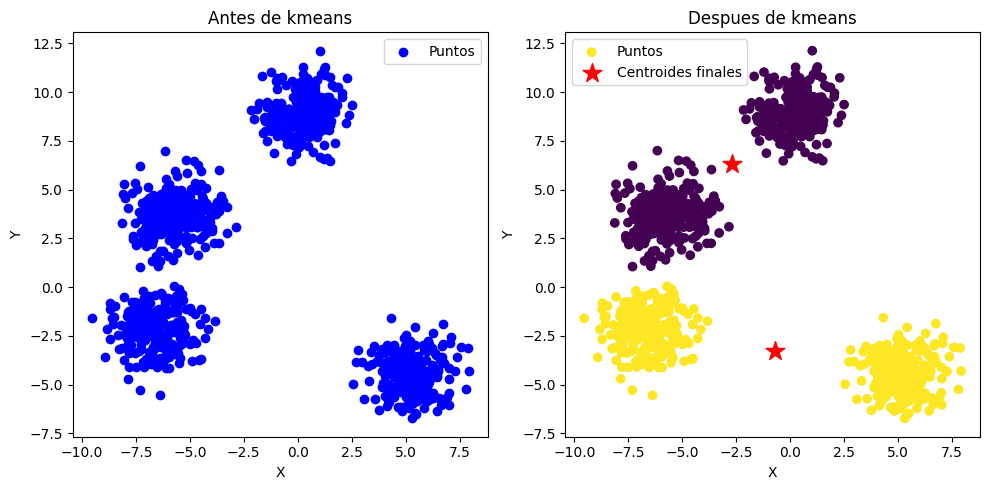

[2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0
 0 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 1 0 2 0 0 0 0 2 0 0 2 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 2 1 0
 2 1 0 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 2 0 0 0 0 0 0 2 1 2 0 0
 0 0 0 0 2 2 0 2 0 1 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0
 0 1 0 0 0 2 1 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 2 0 0 0 0 2 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 1 0 1 1 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 2 1 0 1 0 0 2 0 0 2 0 0 1 2 0
 2 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 1 0 0 0 2 0
 2 0 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 2 2 0 1 0 0 1 2
 0 2 0 0 0 0 0 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0
 0 0 0 0 0 1 2 0 0 0 1 0 

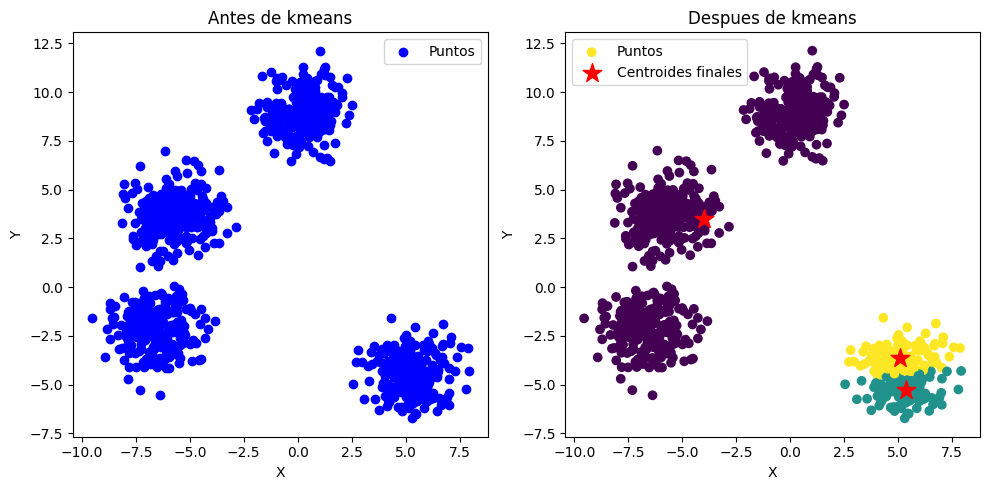

[1 2 3 4 2 2 2 4 4 3 3 3 2 0 0 4 4 4 0 0 3 4 4 4 3 3 4 0 3 3 3 2 0 1 2 4 4
 4 2 4 3 0 0 4 2 2 3 1 2 4 4 4 2 4 3 4 3 3 2 1 2 3 4 2 4 2 0 0 0 4 2 3 3 0
 2 2 3 1 2 2 3 4 2 2 3 3 1 4 2 2 3 0 2 3 2 3 0 1 2 1 2 4 2 4 1 2 4 1 2 2 3
 0 2 0 2 2 4 2 4 0 3 4 1 4 1 4 3 2 2 1 4 2 3 4 2 1 1 4 2 4 0 3 3 4 4 1 0 2
 1 0 3 0 3 3 2 1 4 0 4 3 2 4 3 4 2 2 1 3 2 0 2 1 2 1 3 4 3 3 2 4 1 0 1 4 2
 4 3 2 2 1 1 4 1 4 0 2 2 3 2 1 1 3 4 4 3 3 2 3 2 3 3 2 3 4 2 3 2 4 3 0 4 4
 3 2 3 2 3 4 4 2 3 4 4 2 2 1 2 0 2 4 3 0 3 4 4 2 4 2 2 1 3 4 1 3 4 2 3 4 3
 2 0 2 4 3 1 0 4 3 3 2 4 2 3 4 0 2 3 1 0 2 2 0 0 3 0 2 0 4 3 3 0 3 3 0 2 2
 0 2 3 1 4 4 2 4 1 4 3 2 1 3 3 0 3 3 2 2 0 3 4 4 3 4 3 1 0 3 4 2 0 2 0 0 3
 2 3 1 3 3 2 3 3 2 3 2 2 4 3 3 0 4 4 1 3 4 4 1 0 3 0 4 2 1 3 2 1 2 2 0 1 3
 1 2 4 2 2 4 1 2 4 0 0 3 2 2 2 2 2 3 3 4 3 1 2 2 2 2 3 3 2 0 1 0 4 3 3 1 4
 1 3 0 2 2 3 4 4 4 3 1 4 4 2 2 1 2 2 1 4 0 4 4 4 4 3 3 4 4 1 1 4 0 2 2 0 1
 3 1 2 4 3 3 3 2 2 2 3 0 1 1 2 0 4 4 3 2 4 4 1 4 2 2 4 2 4 4 3 2 1 3 3 1 3
 3 4 2 4 3 0 1 4 4 4 0 4 

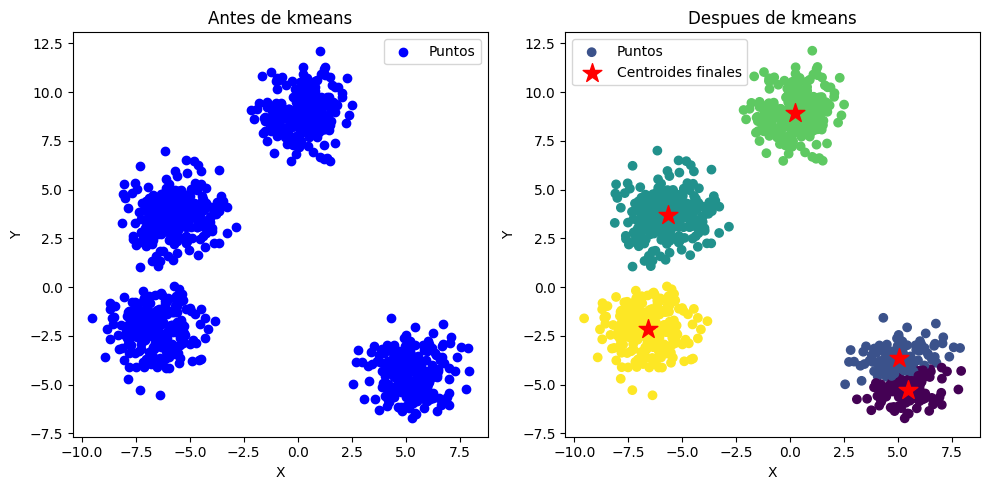

[6 9 7 3 9 8 9 4 3 7 7 7 9 6 6 3 1 4 6 6 7 4 3 1 7 7 1 6 7 7 7 8 6 6 5 3 3
 4 9 3 7 6 6 4 9 2 7 6 2 1 3 4 9 3 7 3 7 7 2 6 5 7 3 5 3 2 6 6 6 4 8 7 7 6
 9 2 7 6 5 2 7 3 9 8 7 7 6 1 2 2 7 6 9 7 8 7 6 6 9 6 8 1 2 3 6 9 1 6 9 9 7
 6 5 6 5 0 3 2 4 6 7 1 6 1 6 3 7 2 5 6 3 0 7 4 9 6 6 3 8 3 6 7 7 1 4 6 6 9
 6 6 7 6 7 7 0 6 3 6 3 7 5 3 7 1 2 8 6 7 9 6 2 6 9 6 7 4 7 7 9 4 6 6 6 4 9
 3 7 0 2 6 6 3 6 1 6 0 8 7 9 6 6 7 1 3 7 7 0 7 5 7 7 8 7 4 5 7 9 1 7 6 3 4
 7 2 7 8 7 4 3 2 7 1 3 2 8 6 9 6 0 3 7 6 7 1 4 8 4 8 9 6 7 3 6 7 1 2 7 1 7
 2 6 9 4 7 6 6 4 7 7 0 3 8 7 3 6 9 7 6 6 8 2 6 6 7 6 5 6 4 7 7 6 7 7 6 0 9
 6 5 7 6 1 3 9 1 6 3 7 9 6 7 7 6 7 7 0 2 6 7 4 3 7 3 7 6 6 7 4 5 6 2 6 6 7
 0 7 6 7 7 5 7 7 8 7 9 9 1 7 7 6 4 3 6 7 4 1 6 6 7 6 1 2 6 7 0 6 5 9 6 6 7
 6 0 3 0 0 4 6 5 3 6 6 7 8 0 5 2 9 7 7 3 7 6 2 2 9 9 7 7 9 6 6 6 4 7 7 6 3
 6 7 6 9 8 7 1 1 1 7 6 3 4 9 8 6 0 5 6 3 6 1 3 4 4 7 7 3 1 6 6 1 6 5 9 6 6
 7 6 2 4 7 7 7 9 9 8 7 6 6 6 9 6 1 1 7 8 3 1 6 1 2 0 3 5 3 4 7 8 6 7 7 6 7
 7 1 5 4 7 6 6 4 3 3 6 4 

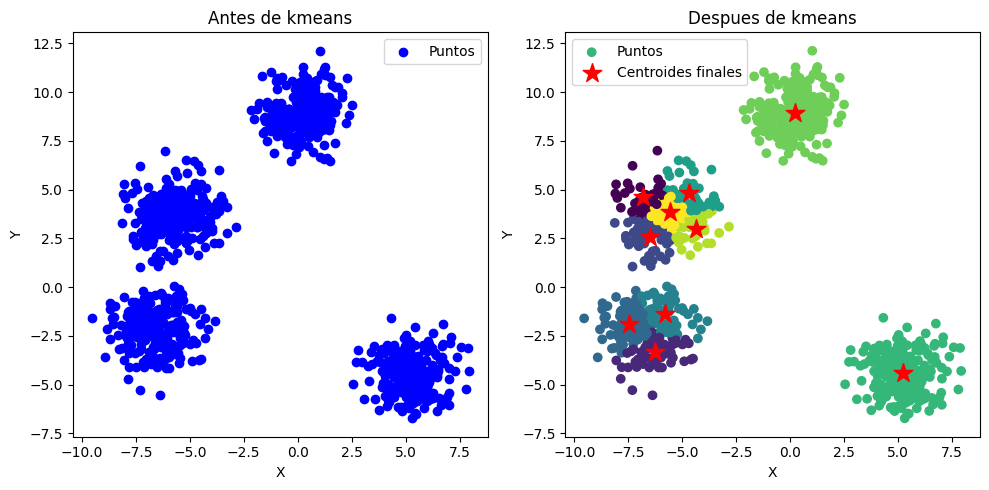

In [ ]:
numeros = [2,3,5,10]

for num in numeros:
    kmeans = KMeans(k=num, max_iter=1000)
    labels = kmeans.run(points)
    print(labels)
    print(kmeans.centroids)

    dibujar2D(points, kmeans.centroids, labels)

# Análisis Experimento 5

# Análisis de la gráfica 1
En la gráfica "antes de kmeans", encontramos que los puntos son todos de color azul,  no hay centroides, ni colores que podamos visualizar lo que indica que aún no han sido clasificados.
En la gráfica "después de kmeans", se puede observar que se hizo la clasificación de los clústers por colores, se puede observar que hay 2 grupos de color morado y las otras 2 agrupaciones de color amarillo. Sin embargo, parece que k-means clasificó las cuatro agrupaciones en solo dos clústers, lo que se entiende que el número de clusters elegido "k" fue 2 en lugar de 4 (lo cual, se puede observar en el código).

El primer centroide se encuentra entre los 2 grupos de color morado. Y el otro centroide lo podemos encontrar en el centro de los grupos de color amarillo. Recordemos que los centroides son aquellas estrellitas rojas que se logran observar en el gráfico.


# Análisis de la gráfica 2
Observamos que en la gráfica "antes de kmeans", todos los puntos están de color azul, lo que indica que aún no han sido clasificados. Tampoco hay colores, ni centroides visibles.
Luego, en la gráfica "después de kmeans", se puede observar que se clasificó los clústers por colores.
* Hay 3 agrupaciones de color morado, (Estas primeras 3 agrupaciones se unieron en un solo clúster) un grupo de color amarillo y la última agrupación está de color verde. Sin embargo, parece que k-means clasificó las cuatro agrupaciones originales en solo tres clusters, lo que se entiende que el número de clústers elegido "k" fue 3 en lugar de 4.
*  El primer centroide se encuentra entre las tres agrupaciones de color morado. El segundo centroide lo podemos encontrar en el centro de la agrupación amarilla. Y el tercer centroide lo podemos encontrar en el centro de la agrupación verde.
La clasificación no es completamente precisa porque tres agrupaciones se fusionaron en un solo cluster (morado).


# Análisis de la gráfica 3
Podemos ver en la gráfica de "antes de kmeans", que los puntos son todos de color azul, lo que indica que aún no han sido clasificados. Tampoco hay colores, ni centroides visibles.
Después de aplicar kmeans, observamos que se clasificó los clústers por colores:
* 1 grupo de color verde (oscuro), 1 grupo de color verde (claro), 1 grupo de color amarillo e hizo una subdivision de un grupo (color azul y color morado). Para esta gráfica el número de clusters elegido "k" fue 5,  lo que llevó a la separación de los puntos en cinco clusters en lugar de cuatro.
*  Los cinco centroides se encuentran ubicados en el centro de cada agrupación.
Sería necesario analizar si este valor es el más adecuado o si se debe ajustar para reflejar mejor la estructura original de los datos.

# Análisis de la gráfica 4
Vemos que en el gráfico de "antes de kmeans" todos los puntos son de color azul, lo que indica que aún no han sido clasificados.
Después de aplicar kmeans, vemos que los puntos fueron clasificados en 10 clústers cada uno tiene un color diferente, también encontramos 10 centroides cada uno ubicado en el centro de cada agrupación. Se observa que algunas agrupaciones se subdividió en partes más pequeñas.

Algo particular que analizamos es que el código genero diez clústers en lugar de 4, lo que es un número bastante exagerado, ya que se generó más clústers de los que eran necesarios.










# Experimento 6

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)

[3 4 2 1 4 4 4 1 1 2 2 2 4 3 3 1 1 1 3 3 2 1 1 1 2 2 1 3 2 2 2 4 3 3 4 1 1
 1 4 1 2 3 3 1 0 0 2 3 0 1 1 1 0 1 2 1 2 2 0 3 4 2 1 4 1 0 3 3 3 1 4 2 2 3
 4 0 2 3 4 0 2 1 4 4 2 2 3 1 0 0 2 3 4 2 0 2 3 3 4 3 4 1 0 1 3 4 1 3 4 0 2
 3 4 3 4 0 1 0 1 3 2 1 3 1 3 1 2 0 4 3 1 4 2 1 4 3 3 1 4 1 3 2 2 1 1 3 3 0
 3 3 2 3 2 2 0 3 1 3 1 2 4 1 2 1 0 4 3 2 0 3 0 3 4 3 2 1 2 2 0 1 3 3 3 1 0
 1 2 0 0 3 3 1 3 1 3 0 4 2 4 3 3 2 1 1 2 2 0 2 4 2 2 4 2 1 4 2 4 1 2 3 1 1
 2 0 2 4 2 1 1 0 2 1 1 0 4 3 4 3 0 1 2 3 2 1 1 0 1 4 4 3 2 1 3 2 1 0 2 1 2
 0 3 4 1 2 3 3 1 2 2 0 1 4 2 1 3 0 2 3 3 4 0 3 3 2 3 4 3 1 2 2 3 2 2 3 4 4
 3 4 2 3 1 1 0 1 3 1 2 0 3 2 2 3 2 2 0 0 3 2 1 1 2 1 2 3 3 2 1 4 3 0 3 3 2
 4 2 3 2 2 4 2 2 0 2 0 4 1 2 2 3 1 1 3 2 1 1 3 3 2 3 1 0 3 2 0 3 4 4 3 3 2
 3 0 1 0 0 1 3 4 1 3 3 2 4 0 4 0 4 2 2 1 2 3 0 0 4 4 2 2 4 3 3 3 1 2 2 3 1
 3 2 3 4 4 2 1 1 1 2 3 1 1 0 4 3 0 4 3 1 3 1 1 1 1 2 2 1 1 3 3 1 3 4 0 3 3
 2 3 0 1 2 2 2 4 4 4 2 3 3 3 4 3 1 1 2 0 1 1 3 1 0 0 1 4 1 1 2 4 3 2 2 3 2
 2 1 4 1 2 3 3 1 1 1 3 1 

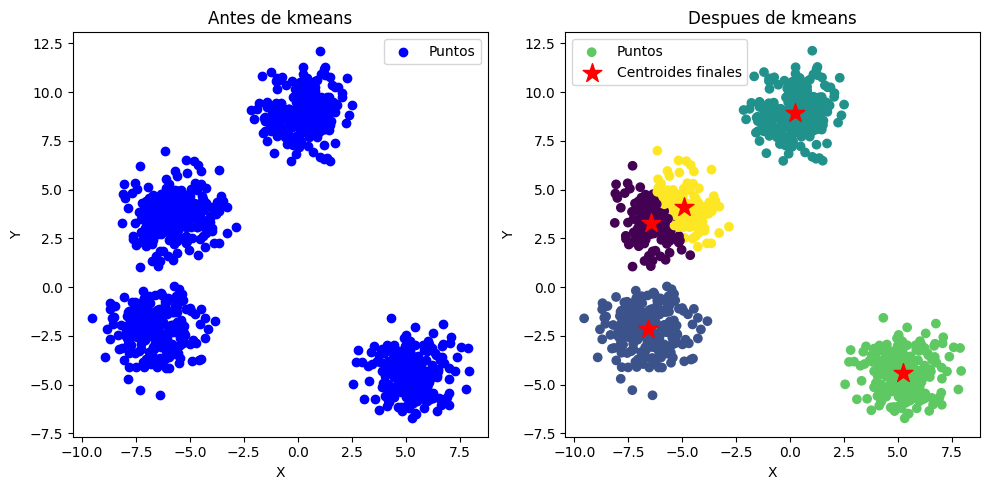

[0 1 4 3 1 1 1 3 2 4 4 4 1 0 0 2 2 3 0 0 4 3 2 2 4 4 2 0 4 4 4 1 0 0 1 3 2
 3 1 3 4 0 0 3 1 1 4 0 1 2 2 3 1 3 4 3 4 4 1 0 1 4 3 1 3 1 0 0 0 3 1 4 4 0
 1 1 4 0 1 1 4 3 1 1 4 4 0 2 1 1 4 0 1 4 1 4 0 0 1 0 1 2 1 2 0 1 2 0 1 1 4
 0 1 0 1 1 3 1 3 0 4 2 0 2 0 3 4 1 1 0 2 1 4 3 1 0 0 3 1 3 0 4 4 2 3 0 0 1
 0 0 4 0 4 4 1 0 3 0 3 4 1 2 4 2 1 1 0 4 1 0 1 0 1 0 4 3 4 4 1 2 0 0 0 2 1
 2 4 1 1 0 0 3 0 2 0 1 1 4 1 0 0 4 2 3 4 4 1 4 1 4 4 1 4 3 1 4 1 2 4 0 3 3
 4 1 4 1 4 3 3 1 4 2 3 1 1 0 1 0 1 3 4 0 4 2 3 1 3 1 1 0 4 3 0 4 2 1 4 2 4
 1 0 1 2 4 0 0 3 4 4 1 2 1 4 2 0 1 4 0 0 1 1 0 0 4 0 1 0 3 4 4 0 4 4 0 1 1
 0 1 4 0 2 2 1 2 0 3 4 1 0 4 4 0 4 4 1 1 0 4 3 2 4 3 4 0 0 4 3 1 0 1 0 0 4
 1 4 0 4 4 1 4 4 1 4 1 1 2 4 4 0 3 3 0 4 3 2 0 0 4 0 2 1 0 4 1 0 1 1 0 0 4
 0 1 3 1 1 3 0 1 2 0 0 4 1 1 1 1 1 4 4 3 4 0 1 1 1 1 4 4 1 0 0 0 3 4 4 0 3
 0 4 0 1 1 4 2 2 2 4 0 2 3 1 1 0 1 1 0 3 0 2 2 3 3 4 4 3 2 0 0 2 0 1 1 0 0
 4 0 1 3 4 4 4 1 1 1 4 0 0 0 1 0 2 2 4 1 3 2 0 2 1 1 3 1 3 3 4 1 0 4 4 0 4
 4 2 1 2 4 0 0 2 3 3 0 3 

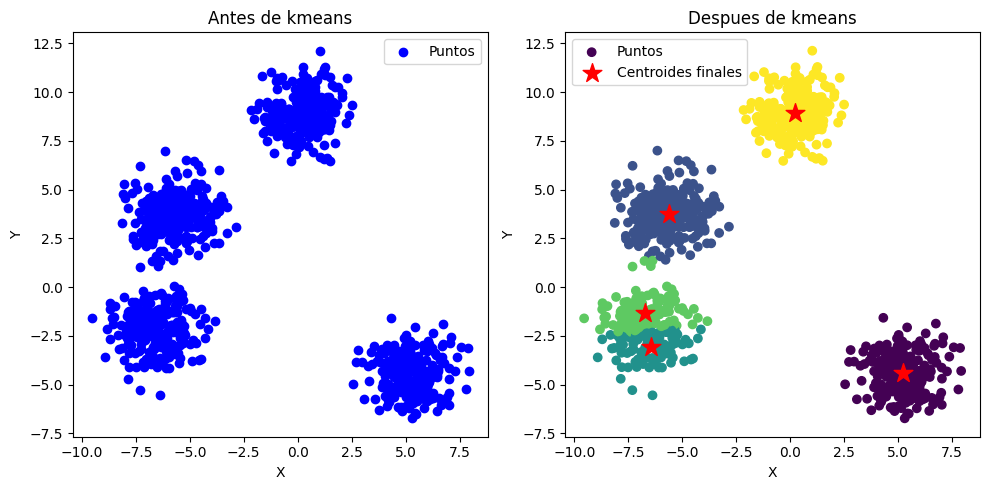

[1 3 4 3 3 3 3 3 3 4 4 4 3 0 0 3 3 3 0 0 4 3 3 3 4 4 3 0 4 4 4 3 1 2 3 3 3
 3 3 3 4 0 1 3 3 3 4 2 3 3 3 3 3 3 4 3 4 4 3 1 4 4 3 3 3 3 1 0 1 3 3 4 4 0
 3 3 4 2 3 3 4 3 3 3 4 4 2 3 3 3 4 0 3 4 3 4 0 2 3 2 3 3 3 3 2 3 3 1 3 3 4
 0 3 0 3 3 3 3 3 0 4 3 1 3 1 3 4 3 3 2 3 3 4 3 3 2 1 3 3 3 1 4 4 3 3 2 0 3
 2 0 4 0 4 4 3 2 3 0 3 4 3 3 4 3 3 3 2 4 3 0 3 2 3 1 4 3 4 4 3 3 2 2 2 3 3
 3 4 3 3 1 2 3 1 3 0 3 3 4 3 2 2 4 3 3 4 4 3 4 3 4 4 3 4 3 3 4 3 3 4 2 3 3
 4 3 4 3 4 3 3 3 4 3 3 3 3 2 3 0 3 3 4 1 4 3 3 3 3 3 3 1 4 3 2 4 3 3 4 3 4
 3 0 3 3 4 2 0 3 4 4 3 3 3 4 3 0 3 4 1 0 3 3 0 0 4 0 3 0 3 4 4 0 4 4 2 3 3
 0 3 4 1 3 3 3 3 2 3 4 3 1 4 4 0 4 4 3 3 0 4 3 3 4 3 4 1 0 4 3 3 1 3 1 0 4
 3 4 2 4 4 3 4 4 3 4 3 3 3 4 4 0 3 3 2 4 3 3 2 0 4 0 3 3 2 4 3 2 3 3 0 2 4
 1 3 3 3 3 3 1 3 3 0 0 4 3 3 3 3 3 4 4 3 4 2 3 3 3 3 4 4 3 0 1 0 3 4 4 2 3
 2 4 0 3 3 4 3 3 3 4 2 3 3 3 3 1 3 3 1 3 0 3 3 3 3 4 4 3 3 1 2 3 0 3 3 0 2
 4 2 3 3 4 4 4 3 3 3 4 0 2 2 3 0 3 3 4 3 3 3 2 3 3 3 3 3 3 3 4 3 1 4 4 2 4
 4 3 3 3 4 2 1 3 3 3 0 3 

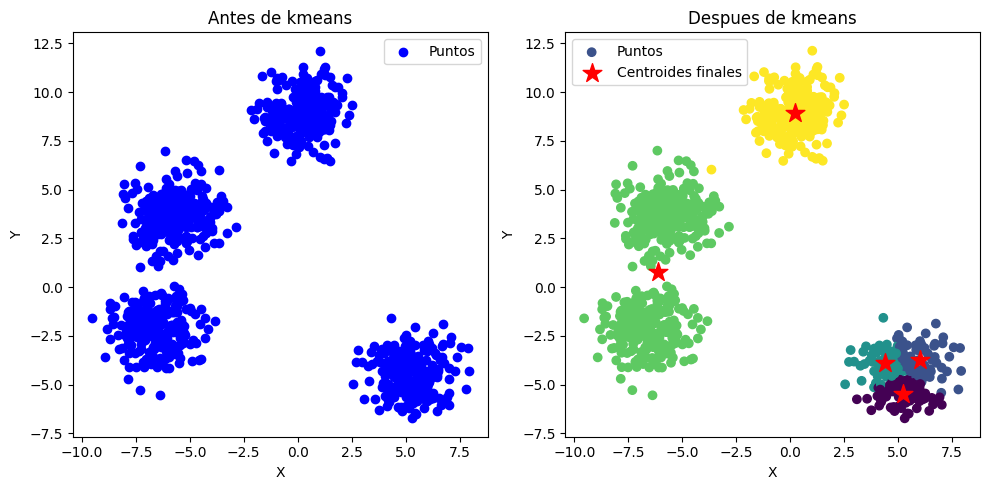

In [ ]:
distancias = ['euclidean', 'manhattan', 'mahalanobis']

for distancia in distancias:
    kmeans = KMeans(k=5, max_iter=1000)
    labels = kmeans.run(points, distancia)
    print(labels)
    print(kmeans.centroids)
    dibujar2D(points, kmeans.centroids, labels)

# Análisis Experimento 6

# Análisis Gráfica 1
En el gráfico "después de kmeans" podemos ver cinco centroides lo que indica el número de clústers 5. Se observa que una agrupación se subdividió en 2 partes. Vemos unas zonas más dispersas según la gráfica. La métrica Mahalanobis pudo haber generado agrupaciones más ajustadas en comparación con Euclidiana y Manhattan, ya que ajusta las distancias según la distribución de los datos. Si analizamos las diferencias en las agrupaciones entre las iteraciones con distintas distancias, esto indica que la selección de la métrica afecta fuermente los resultados del clustering.

#Análisis gráfica 2
En el gráfico "después de kmeans" podemos observar 5 centroides que son las estrellitas de color rojo, así como en la imagen anterior también podemos observar a cada clúster con su respectivo color. De igual forma encontramos una agrupación que se encuentra en la parte inferior izquierda subdividida en 2 partes, lo que puede estar relacionado con la métrica de distancia utilizada. Según unas investigaciones hechas en base a la gráfica y a las distancias, encontramos que este resultado podría haber sido obtenido con la distancia euclidiana o manhattan, ya que los clusters tienen formas más redondeadas o cuadradas. Si se usara Mahalanobis, tal vez los clústers serían más inclinados dependiendo de la varianza de los datos.

#Análisis Gráfica 3
En el gráfico "después de kmeans", podemos ver un grupo verde alargado en el centro, lo que sugiere que los puntos fueron asignados a un mismo clúster aunque parecen tener dos densidades diferentes.
El grupo inferior derecho (morado) tiene 3 centroides lo que indica que dividió el grupo en varias partes. Unos de los centroides se encuentra en el grupo verde alargado, lo que probablemente el algoritmo lo detectó como un conjunto más extendido y en la parte inferior derecha hay un grpo que tiene tres centroides lo que quiere decir que esa zona se sobresegmentó.